In [1]:
from hermes.clustering import RBPots
import numpy as np
import networkx as nx

/Users/camilovelezr/miniforge3/envs/hermes2/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:394: UserWarning: <built-in function array> is not a Python type (it may be an instance of an object), Pydantic will allow any object with no validation since we cannot even enforce that the input is an instance of the given type. To get rid of this error wrap the type with `pydantic.SkipValidation`.
  warn(


In [2]:
n = RBPots(locations=np.array([[0,0] , [1,1], [0,1], [1,0], [10,10]]), measurements = np.array([5,5,5,5, 10]).reshape(-1,1))

#0 building with "desktop-linux" instance using docker driver

#1 [internal] load build definition from Dockerfile
#1 transferring dockerfile: 465B done
#1 DONE 0.0s

#2 [auth] library/ubuntu:pull token for registry-1.docker.io
#2 DONE 0.0s

#3 [internal] load metadata for docker.io/library/ubuntu:22.04
#3 DONE 0.4s

#4 [internal] load .dockerignore
#4 transferring context: 2B done
#4 DONE 0.0s

#5 [1/5] FROM docker.io/library/ubuntu:22.04@sha256:a6d2b38300ce017add71440577d5b0a90460d0e57fd7aec21dd0d1b0761bbfb2
#5 DONE 0.0s

#6 [internal] load build context
#6 transferring context: 728B done
#6 DONE 0.0s

#7 [2/5] RUN apt update &&     apt install software-properties-common -y &&     apt install curl -y &&     curl https://bootstrap.pypa.io/get-pip.py -o get-pip.py &&     python3 get-pip.py &&     apt autoremove -y &&     rm -rf /var/lib/apt/lists/*
#7 CACHED

#8 [3/5] RUN pip install grpcio grpcio-tools networkx cdlib leidenalg
#8 CACHED

#9 [4/5] COPY . /opt/cd
#9 CACHED

#10 [5/5] RU

initialized measurements_distances


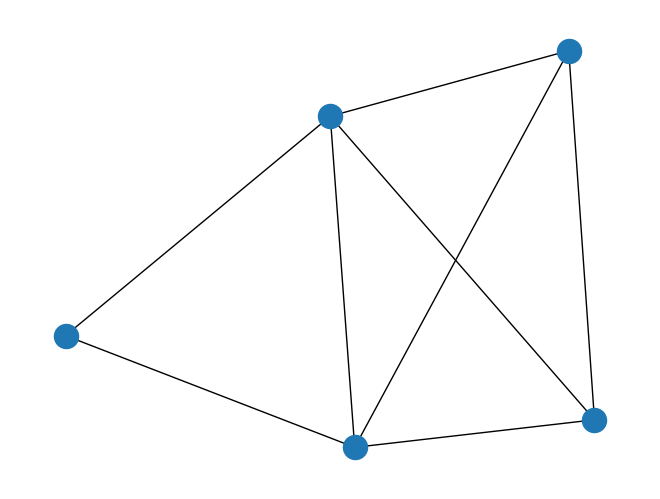

In [3]:
nx.draw(n.graph)

In [4]:
from cdlib import algorithms  # type: ignore


def rbpots(G, res):
    """Cluster the graph using the RB Pots algorithm.
    G is a networkx graph object
    res is a tunable parameter float for the resolution"""
    # Cluster with RB Pots Algorithm
    clusters = algorithms.rb_pots(G, weights="Weight", resolution_parameter=res)

    # Label the graph with the clusters
    for i, k in enumerate(clusters.communities):
        for q in k:
            nx.set_node_attributes(G, {q: i}, name="Labels")
    # Extract the labels
    labels = np.asarray(G.nodes.data(data="Labels"))[:, 1]

    # Return the labels and the modified graph (which now includes the labels)
    return labels, G

Note: to be able to use all crisp methods, you need to install some additional packages:  {'bayanpy', 'graph_tool', 'wurlitzer', 'infomap'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


In [5]:
import json
json.dumps(nx.node_link_data(n.graph), default=str)

'{"directed": false, "multigraph": false, "graph": {}, "nodes": [{"pos": ["0", "0"], "id": 0}, {"pos": ["1", "1"], "id": 1}, {"pos": ["0", "1"], "id": 2}, {"pos": ["1", "0"], "id": 3}, {"pos": ["10", "10"], "id": 4}], "links": [{"Distance": 0.0, "Weight": 1.0, "source": 0, "target": "2"}, {"Distance": 0.0, "Weight": 1.0, "source": 0, "target": "3"}, {"Distance": 0.0, "Weight": 1.0, "source": 1, "target": "2"}, {"Distance": 0.0, "Weight": 1.0, "source": 1, "target": "3"}, {"Distance": 5.0, "Weight": 1.3887943864964021e-11, "source": 1, "target": "4"}, {"Distance": 0.0, "Weight": 1.0, "source": 2, "target": "3"}, {"Distance": 5.0, "Weight": 1.3887943864964021e-11, "source": 2, "target": "4"}, {"Distance": 5.0, "Weight": 1.3887943864964021e-11, "source": 3, "target": "4"}]}'

In [6]:
rbpots(n.graph, 1)

(array([0, 0, 0, 0, 1]), <networkx.classes.graph.Graph at 0x314eacf50>)

In [8]:
n.cluster()

In [9]:
n.labels

array([0, 0, 0, 0, 0])

In [ ]:
n.graph_to_send

In [ ]:
nx.node_link_data(n.graph)

In [10]:
graph_data = json.loads(n.graph_to_send.data)

In [17]:
graph_data

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'pos': ['0', '0'], 'Labels': 0, 'id': 0},
  {'pos': ['1', '1'], 'Labels': 0, 'id': 1},
  {'pos': ['0', '1'], 'Labels': 0, 'id': 2},
  {'pos': ['1', '0'], 'Labels': 0, 'id': 3},
  {'pos': ['10', '10'], 'Labels': 1, 'id': 4}],
 'links': [{'Distance': 0.0, 'Weight': 1.0, 'source': 0, 'target': '2'},
  {'Distance': 0.0, 'Weight': 1.0, 'source': 0, 'target': '3'},
  {'Distance': 0.0, 'Weight': 1.0, 'source': 1, 'target': '2'},
  {'Distance': 0.0, 'Weight': 1.0, 'source': 1, 'target': '3'},
  {'Distance': 5.0,
   'Weight': 1.3887943864964021e-11,
   'source': 1,
   'target': '4'},
  {'Distance': 0.0, 'Weight': 1.0, 'source': 2, 'target': '3'},
  {'Distance': 5.0,
   'Weight': 1.3887943864964021e-11,
   'source': 2,
   'target': '4'},
  {'Distance': 5.0,
   'Weight': 1.3887943864964021e-11,
   'source': 3,
   'target': '4'}]}

In [23]:
np.int64(2)

int